In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [5]:
start = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()
tickers=["SPY"]
timeframe="1Day"

In [6]:
SPY_df = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
SPY_df.sort_index(inplace=True)
SPY_df.index = SPY_df.index.date
SPY_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2019-05-01,294.72,294.95,291.8000,291.82,71921870,337374,293.457138,SPY
2019-05-02,291.68,292.70,289.5200,291.13,65058183,342564,291.101680,SPY
2019-05-03,292.82,294.34,291.2998,293.98,56579556,249557,293.438891,SPY
2019-05-06,289.25,293.31,288.9000,292.83,107250892,390959,291.952803,SPY
2019-05-07,290.15,290.81,285.8100,288.05,145292657,618594,288.280747,SPY


In [7]:
ES_data = Path("./Resources/ES.csv")
ES_df = pd.read_csv(ES_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
ES_df.sort_index(inplace=True)
ES_df.rename(columns={'Close/Last': 'close'}, inplace=True)
ES_df.index = ES_df.index.date
ES_df.head()

,close,Volume,Open,High,Low
2018-05-01,2652.25,1294588,2646.25,2658.00,2623.25
2018-05-02,2627.50,1368993,2655.50,2658.50,2624.25
2018-05-03,2631.80,2085915,2626.75,2636.25,2591.25
2018-05-04,2663.00,1627248,2631.75,2669.50,2612.25
2018-05-07,2670.00,1106056,2662.75,2681.50,2661.25


In [8]:
MES_data = Path("./Resources/MES.csv")
MES_df = pd.read_csv(MES_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
MES_df.sort_index(inplace=True)
MES_df.rename(columns={'Close': 'close'}, inplace=True)
MES_df.index = MES_df.index.date
MES_df.head()

,Open,High,Low,close,Adj Close,Volume
2019-05-06,2947.50,2947.50,2883.75,2932.50,2932.50,159243
2019-05-07,2912.00,2930.75,2862.50,2890.75,2890.75,246925
2019-05-08,2890.25,2899.25,2868.75,2887.25,2887.25,254506
2019-05-09,2884.25,2885.50,2836.25,2872.75,2872.75,340659
2019-05-10,2870.25,2893.00,2826.00,2887.00,2887.00,396057


In [9]:
WTI_data = Path("./Resources/WTI.csv")
WTI_df = pd.read_csv(WTI_data, index_col="Day", parse_dates=True, infer_datetime_format=True)
WTI_df.sort_index(inplace=True)
WTI_df.columns=["close"]
WTI_df.index = WTI_df.index.date
WTI_df.head()

,close
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [10]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY_df, ES_df, MES_df, WTI_df], axis=1, keys=["SPY","ES","MES","WTI"])
df_ticker.dropna(inplace=True)
# Display sample data
df_ticker.head()

SPY                                                   \
              open    high     low   close       volume trade_count   
2019-05-06  289.25  293.31  288.90  292.83  107250892.0    390959.0   
2019-05-07  290.15  290.81  285.81  288.05  145292657.0    618594.0   
2019-05-08  287.53  289.43  286.87  287.73   91714817.0    455857.0   
2019-05-09  285.23  287.33  283.30  286.67  103471271.0    526341.0   
2019-05-10  285.62  288.94  282.30  288.03  112603342.0    602402.0   

                                   ES                                        \
                  vwap symbol   close     Volume     Open     High      Low   
2019-05-06  291.952803    SPY  2932.4  1965905.0  2917.75  2938.25  2883.50   
2019-05-07  288.280747    SPY  2890.8  2735611.0  2911.75  2930.50  2862.50   
2019-05-08  288.141309    SPY  2887.2  2005048.0  2889.75  2899.50  2868.75   
2019-05-09  285.580572    SPY  2872.7  2655796.0  2884.00  2885.50  2836.25   
2019-05-10  285.828611    SPY  2887.0  2785919.0  2869.75  2893.00  2826.00   

                MES                                                   WTI  
               Open     High      Low    close Adj Close    Volume  close  
2019-05-06  2947.50  2947.50  2883.75  2932.50   2932.50  159243.0  62.30  
2019-05-07  2912.00  2930.75  2862.50  2890.75   2890.75  246925.0  61.41  
2019-05-08  2890.25  2899.25  2868.75  2887.25   2887.25  254506.0  62.13  
2019-05-09  2884.25  2885.50  2836.25  2872.75   2872.75  340659.0  61.58  
2019-05-10  2870.25  2893.00  2826.00  2887.00   2887.00  396057.0  61.65

In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_SPY = MCSimulation(
    portfolio_data=df_ticker,
    weights=[1,0,0,0],
    num_simulation=1000,
    num_trading_days=252*5
)    
# Print the simulation input data
MC_SPY.portfolio_data.head()

SPY                                                   \
              open    high     low   close       volume trade_count   
2019-05-06  289.25  293.31  288.90  292.83  107250892.0    390959.0   
2019-05-07  290.15  290.81  285.81  288.05  145292657.0    618594.0   
2019-05-08  287.53  289.43  286.87  287.73   91714817.0    455857.0   
2019-05-09  285.23  287.33  283.30  286.67  103471271.0    526341.0   
2019-05-10  285.62  288.94  282.30  288.03  112603342.0    602402.0   

                                                ES  ...                   MES  \
                  vwap symbol daily_return   close  ... daily_return     Open   
2019-05-06  291.952803    SPY          NaN  2932.4  ...          NaN  2947.50   
2019-05-07  288.280747    SPY    -0.016323  2890.8  ...    -0.014186  2912.00   
2019-05-08  288.141309    SPY    -0.001111  2887.2  ...    -0.001245  2890.25   
2019-05-09  285.580572    SPY    -0.003684  2872.7  ...    -0.005022  2884.25   
2019-05-10  285.828611    SPY     0.004744  2887.0  ...     0.004978  2870.25   

                                                                          WTI  \
               High      Low    close Adj Close    Volume daily_return  close   
2019-05-06  2947.50  2883.75  2932.50   2932.50  159243.0          NaN  62.30   
2019-05-07  2930.75  2862.50  2890.75   2890.75  246925.0    -0.014237  61.41   
2019-05-08  2899.25  2868.75  2887.25   2887.25  254506.0    -0.001211  62.13   
2019-05-09  2885.50  2836.25  2872.75   2872.75  340659.0    -0.005022  61.58   
2019-05-10  2893.00  2826.00  2887.00   2887.00  396057.0     0.004960  61.65   

                         
           daily_return  
2019-05-06          NaN  
2019-05-07    -0.014286  
2019-05-08     0.011724  
2019-05-09    -0.008852  
2019-05-10     0.001137  

[5 rows x 24 columns]

In [12]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/SP-Arbitrage/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012624,1.008007,1.013392,0.983716,1.008546,1.019046,1.009868,0.989133,1.008391,0.977376,...,0.985165,1.001733,1.001278,1.020906,1.022878,0.984816,0.985104,1.019225,0.994469,1.004513
2,1.021315,0.985830,1.011325,0.952269,1.022229,0.993787,1.048224,0.990204,1.002399,0.991803,...,0.962601,1.015574,0.987790,1.012088,1.013707,0.980111,1.004978,1.004028,1.003898,1.004928
3,1.034662,0.989870,1.013847,0.950658,1.029683,0.992471,1.054535,0.982738,1.009676,0.985241,...,0.972519,0.998848,1.018053,0.997542,1.015174,0.965987,1.009223,1.002369,0.990689,0.987415
4,1.025911,0.987489,1.004266,0.959852,1.016752,0.988939,1.047412,0.996391,1.025299,0.982351,...,0.957529,1.020217,1.019418,0.988870,1.013152,0.968928,1.009826,0.990249,0.973696,0.990492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.272086,1.308899,2.719151,1.117777,2.429909,1.934411,4.326644,1.104064,0.719830,4.088207,...,1.262146,1.216413,1.051405,1.023692,1.674844,4.125552,1.528048,3.202934,1.828422,1.828628
1257,1.263347,1.352847,2.704443,1.081828,2.430958,1.953062,4.340396,1.116290,0.723800,4.060651,...,1.234985,1.209918,1.056117,1.038189,1.691461,4.056657,1.527495,3.173800,1.834614,1.778618
1258,1.269168,1.374548,2.698717,1.077136,2.469547,1.931574,4.310771,1.115034,0.740411,4.037696,...,1.229556,1.238585,1.053320,1.046421,1.686339,4.080499,1.546175,3.276477,1.857927,1.795168
1259,1.252371,1.345882,2.674981,1.048731,2.440571,1.964910,4.248258,1.101744,0.728045,4.024247,...,1.232145,1.221142,1.054020,1.070335,1.692977,4.008063,1.579962,3.295216,1.875782,1.835491


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

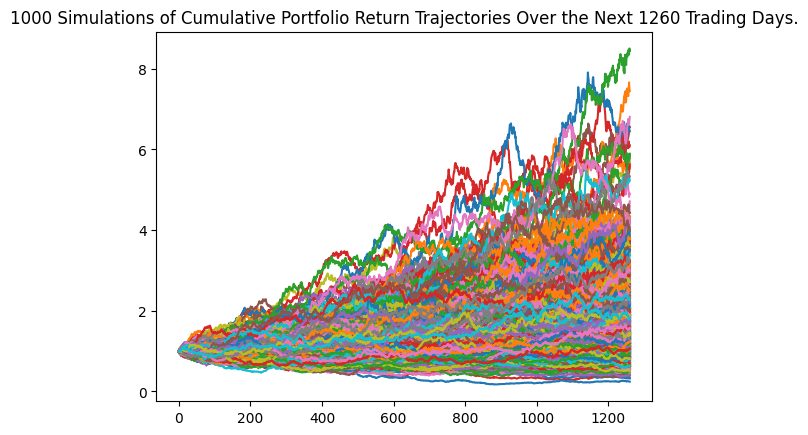

In [13]:
# Plot simulation outcomes
MC_SPY.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

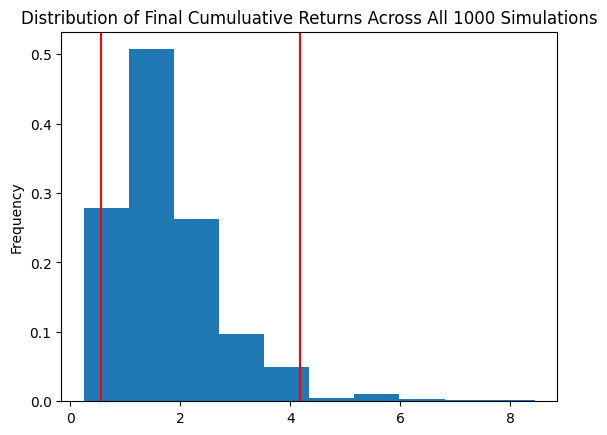

In [14]:
# Plot probability distribution and confidence intervals
MC_SPY.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_SPY = MC_SPY.summarize_cumulative_return()

# Print summary statistics
print(tbl_SPY)

count           1000.000000
mean               1.774666
std                0.988753
min                0.242535
25%                1.102059
50%                1.558357
75%                2.185494
max                8.446952
95% CI Lower       0.561654
95% CI Upper       4.180597
Name: 1260, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
ci_lower_SPY = round(tbl_SPY[8]*10000,2)
ci_upper_SPY = round(tbl_SPY[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f"over the next 5 years will end within in the range of ${ci_lower_SPY} and ${ci_upper_SPY}")

There is a 95% chance that an initial investment of $10,000 in the portfolioover the next 5 years will end within in the range of $5616.54 and $41805.97


In [17]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_ES = MCSimulation(
    portfolio_data=df_ticker,
    weights=[0,1,0,0],
    num_simulation=1000,
    num_trading_days=252*5
)    
# Print the simulation input data
MC_ES.portfolio_data.head()

SPY                                                   \
              open    high     low   close       volume trade_count   
2019-05-06  289.25  293.31  288.90  292.83  107250892.0    390959.0   
2019-05-07  290.15  290.81  285.81  288.05  145292657.0    618594.0   
2019-05-08  287.53  289.43  286.87  287.73   91714817.0    455857.0   
2019-05-09  285.23  287.33  283.30  286.67  103471271.0    526341.0   
2019-05-10  285.62  288.94  282.30  288.03  112603342.0    602402.0   

                                                ES  ...                   MES  \
                  vwap symbol daily_return   close  ... daily_return     Open   
2019-05-06  291.952803    SPY          NaN  2932.4  ...          NaN  2947.50   
2019-05-07  288.280747    SPY    -0.016323  2890.8  ...    -0.014186  2912.00   
2019-05-08  288.141309    SPY    -0.001111  2887.2  ...    -0.001245  2890.25   
2019-05-09  285.580572    SPY    -0.003684  2872.7  ...    -0.005022  2884.25   
2019-05-10  285.828611    SPY     0.004744  2887.0  ...     0.004978  2870.25   

                                                                          WTI  \
               High      Low    close Adj Close    Volume daily_return  close   
2019-05-06  2947.50  2883.75  2932.50   2932.50  159243.0          NaN  62.30   
2019-05-07  2930.75  2862.50  2890.75   2890.75  246925.0    -0.014237  61.41   
2019-05-08  2899.25  2868.75  2887.25   2887.25  254506.0    -0.001211  62.13   
2019-05-09  2885.50  2836.25  2872.75   2872.75  340659.0    -0.005022  61.58   
2019-05-10  2893.00  2826.00  2887.00   2887.00  396057.0     0.004960  61.65   

                         
           daily_return  
2019-05-06          NaN  
2019-05-07    -0.014286  
2019-05-08     0.011724  
2019-05-09    -0.008852  
2019-05-10     0.001137  

[5 rows x 24 columns]

In [18]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_ES.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/SP-Arbitrage/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990766,0.979849,1.000280,1.002315,0.986348,0.986765,1.008398,0.998972,1.027908,1.020980,...,1.026074,1.008831,0.997983,1.007766,0.996235,1.007216,0.992535,1.013140,0.993831,1.012188
2,0.999233,0.989550,0.995066,0.971909,0.992595,0.986399,1.025301,1.030761,1.010749,1.041796,...,1.040162,0.996284,0.997589,0.981873,1.006876,0.992698,0.998651,1.007110,0.986309,0.998884
3,0.999826,1.031437,1.014293,0.984231,0.974032,0.961956,1.035514,1.029960,1.010960,1.038446,...,1.048707,1.013094,1.014203,0.975868,0.997436,0.997145,0.988861,1.014300,0.980027,1.000389
4,0.994850,1.060906,1.013835,1.003966,0.986161,0.942228,1.045692,1.007951,1.024158,1.015790,...,1.049843,1.013314,0.991750,0.996712,1.010552,1.022086,0.986005,1.001242,0.988103,1.009807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.677962,4.562579,0.914238,1.144858,0.840305,1.628362,2.419937,1.818579,0.618298,0.828380,...,0.789988,1.976874,1.173880,5.118871,1.719027,1.668606,1.924071,1.759186,0.773131,0.717104
1257,0.698332,4.575139,0.912964,1.137293,0.849814,1.622627,2.394775,1.799296,0.623512,0.819032,...,0.803736,2.004886,1.186449,5.219952,1.721476,1.666942,1.971151,1.734104,0.761977,0.720905
1258,0.702961,4.630856,0.921878,1.173620,0.841596,1.627866,2.394147,1.841830,0.640811,0.829365,...,0.802006,2.074633,1.135168,5.119033,1.706162,1.663770,1.955498,1.766999,0.764374,0.718713
1259,0.705113,4.570271,0.943294,1.174569,0.860021,1.629208,2.396725,1.826292,0.648709,0.861091,...,0.795206,2.029373,1.140810,5.034703,1.700122,1.649388,1.951139,1.753561,0.757034,0.710374


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

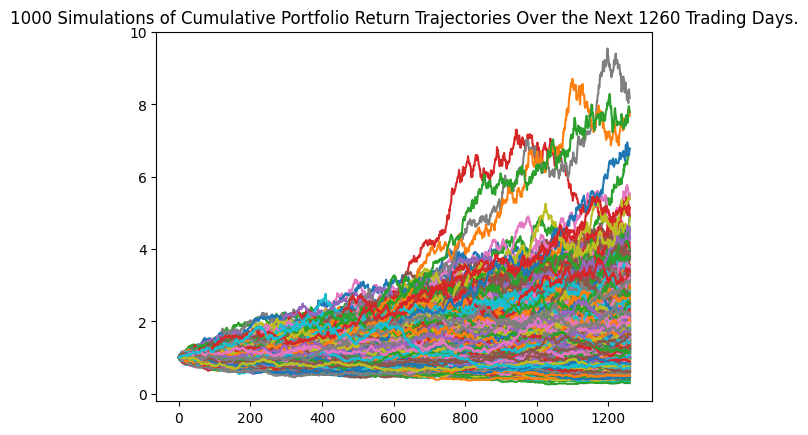

In [19]:
# Plot simulation outcomes
MC_ES.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

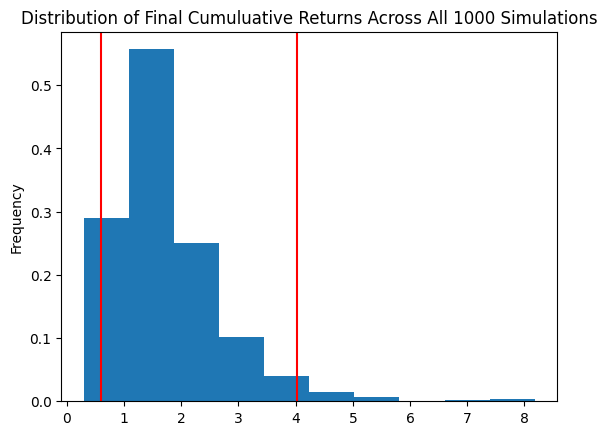

In [20]:
# Plot probability distribution and confidence intervals
MC_ES.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ES = MC_ES.summarize_cumulative_return()

# Print summary statistics
print(tbl_ES)

count           1000.000000
mean               1.736202
std                0.950596
min                0.295313
25%                1.114750
50%                1.532711
75%                2.098305
max                8.181310
95% CI Lower       0.588175
95% CI Upper       4.031496
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
ci_lower_ES = round(tbl_ES[8]*10000,2)
ci_upper_ES = round(tbl_ES[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f"over the next 5 years will end within in the range of ${ci_lower_ES} and ${ci_upper_ES}")

There is a 95% chance that an initial investment of $10,000 in the portfolioover the next 5 years will end within in the range of $5881.75 and $40314.96


In [23]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_MES = MCSimulation(
    portfolio_data=df_ticker,
    weights=[0,0,1,0],
    num_simulation=1000,
    num_trading_days=252*5
)    
# Print the simulation input data
MC_MES.portfolio_data.head()

SPY                                                   \
              open    high     low   close       volume trade_count   
2019-05-06  289.25  293.31  288.90  292.83  107250892.0    390959.0   
2019-05-07  290.15  290.81  285.81  288.05  145292657.0    618594.0   
2019-05-08  287.53  289.43  286.87  287.73   91714817.0    455857.0   
2019-05-09  285.23  287.33  283.30  286.67  103471271.0    526341.0   
2019-05-10  285.62  288.94  282.30  288.03  112603342.0    602402.0   

                                                ES  ...                   MES  \
                  vwap symbol daily_return   close  ... daily_return     Open   
2019-05-06  291.952803    SPY          NaN  2932.4  ...          NaN  2947.50   
2019-05-07  288.280747    SPY    -0.016323  2890.8  ...    -0.014186  2912.00   
2019-05-08  288.141309    SPY    -0.001111  2887.2  ...    -0.001245  2890.25   
2019-05-09  285.580572    SPY    -0.003684  2872.7  ...    -0.005022  2884.25   
2019-05-10  285.828611    SPY     0.004744  2887.0  ...     0.004978  2870.25   

                                                                          WTI  \
               High      Low    close Adj Close    Volume daily_return  close   
2019-05-06  2947.50  2883.75  2932.50   2932.50  159243.0          NaN  62.30   
2019-05-07  2930.75  2862.50  2890.75   2890.75  246925.0    -0.014237  61.41   
2019-05-08  2899.25  2868.75  2887.25   2887.25  254506.0    -0.001211  62.13   
2019-05-09  2885.50  2836.25  2872.75   2872.75  340659.0    -0.005022  61.58   
2019-05-10  2893.00  2826.00  2887.00   2887.00  396057.0     0.004960  61.65   

                         
           daily_return  
2019-05-06          NaN  
2019-05-07    -0.014286  
2019-05-08     0.011724  
2019-05-09    -0.008852  
2019-05-10     0.001137  

[5 rows x 24 columns]

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_MES.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/SP-Arbitrage/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999467,1.015661,1.020933,1.005350,1.002996,0.988528,1.008688,0.995851,1.012444,1.012184,...,0.994250,0.984191,0.992478,1.023174,1.015498,0.997845,1.018303,0.999156,0.985721,0.997459
2,0.998071,1.012209,1.015400,0.973800,1.007002,0.999831,0.991374,0.997452,1.026222,1.025428,...,1.007646,0.982821,1.021670,1.033958,1.001783,0.996919,0.998430,1.003692,0.979517,0.994674
3,0.998812,1.004050,1.018176,0.972588,1.007662,1.011422,0.962825,0.997676,1.020035,1.039096,...,1.015133,0.992821,1.032334,1.025018,1.018244,0.981287,1.000828,1.015588,0.991907,0.996999
4,0.996629,0.972315,1.019871,0.965169,1.020237,1.027807,0.978009,0.981381,1.028870,1.039817,...,1.015378,0.991956,1.052828,1.014202,1.023992,0.996572,0.995813,1.006986,0.998858,1.015410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.804197,0.809196,0.681034,1.296934,2.172843,3.494793,0.659607,4.429984,0.683099,1.048709,...,1.022676,0.878934,2.281305,1.884536,2.767096,1.963910,1.056446,1.624907,2.510701,1.781135
1257,1.833290,0.823578,0.667363,1.288366,2.187107,3.508555,0.664833,4.422700,0.673623,1.033606,...,1.018829,0.869110,2.260273,1.873038,2.750672,1.938367,1.056601,1.607163,2.527872,1.796109
1258,1.836222,0.810694,0.672680,1.260699,2.154834,3.428793,0.659387,4.375991,0.679763,1.059341,...,1.041423,0.854502,2.248980,1.853872,2.805453,1.930222,1.030192,1.578519,2.494146,1.774436
1259,1.859075,0.816669,0.659465,1.270164,2.148355,3.355109,0.657941,4.444755,0.674238,1.061368,...,1.035482,0.853609,2.223344,1.869398,2.848487,1.936475,1.013533,1.577564,2.465952,1.755636


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

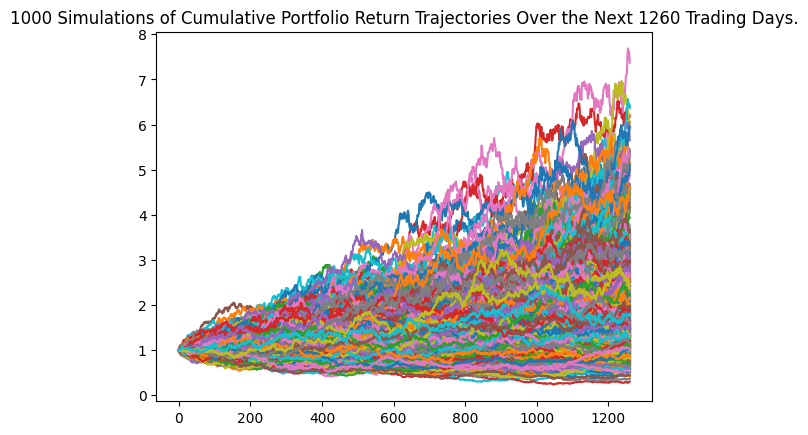

In [25]:
# Plot simulation outcomes
MC_MES.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

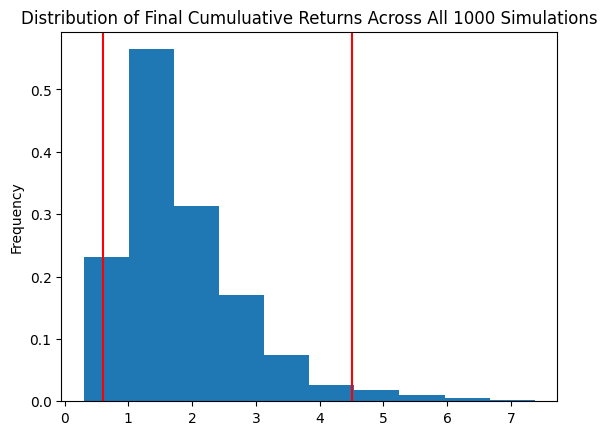

In [26]:
# Plot probability distribution and confidence intervals
MC_MES.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_MES = MC_MES.summarize_cumulative_return()

# Print summary statistics
print(tbl_MES)

count           1000.000000
mean               1.828083
std                0.987764
min                0.301614
25%                1.138047
50%                1.558747
75%                2.284054
max                7.371697
95% CI Lower       0.605685
95% CI Upper       4.510543
Name: 1260, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
ci_lower_MES = round(tbl_MES[8]*10000,2)
ci_upper_MES = round(tbl_MES[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f"over the next 5 years will end within in the range of ${ci_lower_MES} and ${ci_upper_MES}")

There is a 95% chance that an initial investment of $10,000 in the portfolioover the next 5 years will end within in the range of $6056.85 and $45105.43


In [29]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_WTI = MCSimulation(
    portfolio_data=df_ticker,
    weights=[0,0,0,1],
    num_simulation=1000,
    num_trading_days=252*5
)    
# Print the simulation input data
MC_WTI.portfolio_data.head()

SPY                                                   \
              open    high     low   close       volume trade_count   
2019-05-06  289.25  293.31  288.90  292.83  107250892.0    390959.0   
2019-05-07  290.15  290.81  285.81  288.05  145292657.0    618594.0   
2019-05-08  287.53  289.43  286.87  287.73   91714817.0    455857.0   
2019-05-09  285.23  287.33  283.30  286.67  103471271.0    526341.0   
2019-05-10  285.62  288.94  282.30  288.03  112603342.0    602402.0   

                                                ES  ...                   MES  \
                  vwap symbol daily_return   close  ... daily_return     Open   
2019-05-06  291.952803    SPY          NaN  2932.4  ...          NaN  2947.50   
2019-05-07  288.280747    SPY    -0.016323  2890.8  ...    -0.014186  2912.00   
2019-05-08  288.141309    SPY    -0.001111  2887.2  ...    -0.001245  2890.25   
2019-05-09  285.580572    SPY    -0.003684  2872.7  ...    -0.005022  2884.25   
2019-05-10  285.828611    SPY     0.004744  2887.0  ...     0.004978  2870.25   

                                                                          WTI  \
               High      Low    close Adj Close    Volume daily_return  close   
2019-05-06  2947.50  2883.75  2932.50   2932.50  159243.0          NaN  62.30   
2019-05-07  2930.75  2862.50  2890.75   2890.75  246925.0    -0.014237  61.41   
2019-05-08  2899.25  2868.75  2887.25   2887.25  254506.0    -0.001211  62.13   
2019-05-09  2885.50  2836.25  2872.75   2872.75  340659.0    -0.005022  61.58   
2019-05-10  2893.00  2826.00  2887.00   2887.00  396057.0     0.004960  61.65   

                         
           daily_return  
2019-05-06          NaN  
2019-05-07    -0.014286  
2019-05-08     0.011724  
2019-05-09    -0.008852  
2019-05-10     0.001137  

[5 rows x 24 columns]

In [30]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 100% SPY
MC_WTI.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/SP-Arbitrage/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00
1,0.870661,1.097244,0.961197,0.954022,1.051461e+00,0.703341,1.059359e+00,8.557149e-01,1.068945,0.977244,...,0.764070,9.635951e-01,1.019026,0.864021,1.126341,1.006575,9.140147e-01,1.056986,1.075915,9.238105e-01
2,0.794368,1.080195,0.806681,0.841583,8.381941e-01,0.634596,1.002056e+00,1.024416e+00,1.146899,1.016969,...,0.823441,7.650312e-01,1.135041,0.917524,1.182385,1.151758,9.874640e-01,0.985424,1.039125,9.428893e-01
3,0.719966,1.136350,1.004101,0.890528,9.049137e-01,0.702703,9.293297e-01,7.959039e-01,0.883016,1.128479,...,0.917863,6.935726e-01,1.212824,1.030085,1.238220,1.136511,9.508199e-01,0.839819,1.156135,1.002016e+00
4,0.674947,1.121456,1.010774,1.048528,8.172388e-01,0.803185,1.092155e+00,8.776739e-01,0.922041,1.076653,...,0.796138,6.547293e-01,1.122722,1.117810,1.245503,1.079588,9.260995e-01,0.864569,0.987480,9.814733e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.010506,0.000002,0.000009,0.003245,8.257995e-08,0.000002,4.800415e-08,7.922346e-07,0.000007,0.000068,...,0.000012,2.080871e-08,0.000031,0.000010,0.000002,0.000018,2.407567e-08,0.000646,0.000001,4.896612e-08
1257,0.014236,0.000002,0.000008,0.003102,8.356394e-08,0.000002,4.999618e-08,8.734479e-07,0.000007,0.000067,...,0.000012,1.902504e-08,0.000025,0.000009,0.000002,0.000016,2.411285e-08,0.000686,0.000001,4.668364e-08
1258,0.011176,0.000002,0.000009,0.002982,9.813047e-08,0.000002,5.482216e-08,8.740011e-07,0.000006,0.000072,...,0.000013,2.100369e-08,0.000024,0.000009,0.000002,0.000017,2.133810e-08,0.000642,0.000001,4.722908e-08
1259,0.012421,0.000002,0.000008,0.002262,8.227702e-08,0.000002,4.983516e-08,1.048165e-06,0.000007,0.000074,...,0.000012,2.156089e-08,0.000024,0.000009,0.000002,0.000015,2.144252e-08,0.000669,0.000002,5.146013e-08


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

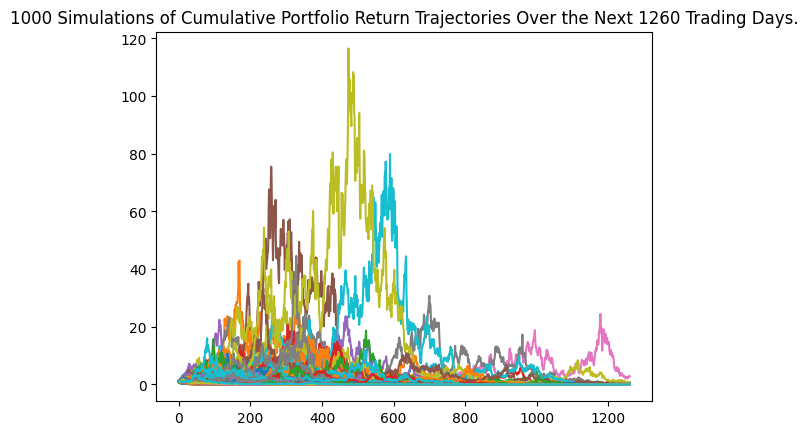

In [31]:
# Plot simulation outcomes
MC_WTI.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

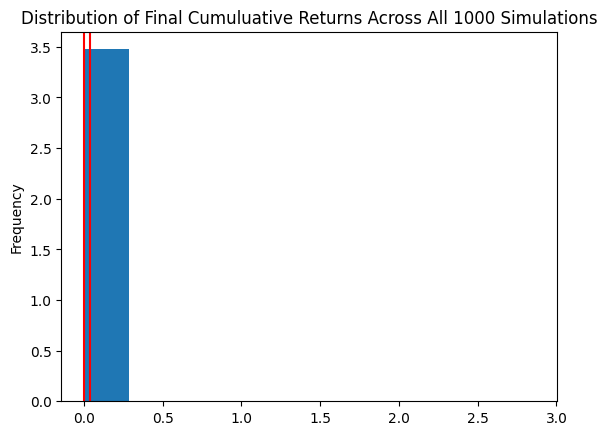

In [32]:
# Plot probability distribution and confidence intervals
MC_WTI.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_WTI = MC_WTI.summarize_cumulative_return()

# Print summary statistics
print(tbl_WTI)

count           1.000000e+03
mean            8.113148e-03
std             9.823129e-02
min             3.400712e-12
25%             8.872059e-07
50%             1.136313e-05
75%             1.819561e-04
max             2.862470e+00
95% CI Lower    4.057401e-09
95% CI Upper    3.630256e-02
Name: 1260, dtype: float64


In [34]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
ci_lower_WTI = round(tbl_WTI[8]*10000,2)
ci_upper_WTI = round(tbl_WTI[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f"over the next 5 years will end within in the range of ${ci_lower_WTI} and ${ci_upper_WTI}")

There is a 95% chance that an initial investment of $10,000 in the portfolioover the next 5 years will end within in the range of $0.0 and $363.03


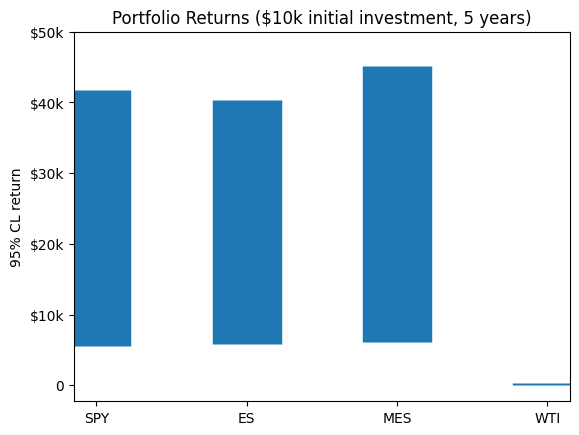

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.vlines(x = 1, ymin = ci_lower_SPY, ymax = ci_upper_SPY, linewidth=50)
ax.vlines(x = 2, ymin = ci_lower_ES,  ymax = ci_upper_ES,  linewidth=50)
ax.vlines(x = 3, ymin = ci_lower_MES, ymax = ci_upper_MES, linewidth=50)
ax.vlines(x = 4, ymin = ci_lower_WTI, ymax = ci_upper_WTI, linewidth=50)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['SPY','ES', 'MES','WTI'])
ax.set_yticks([0,10000,20000,30000,40000,50000])
ax.set_yticklabels(['0', '$10k', '$20k', '$30k', '$40k', '$50k'])
plt.title('Portfolio Returns ($10k initial investment)')
plt.ylabel('5-year return (95% CL)')
plt.savefig('images/returns.png', bbox_inches='tight')